In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

###### Reading the Image

In [2]:
img = cv2.imread('car_plate.jpg')

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

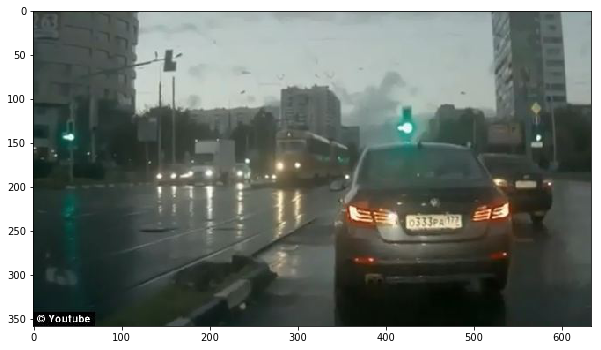

In [4]:
display(img)